## Setup

In [1]:
!pip install --upgrade ai2thor --quiet
!pip install ai2thor-colab prior --upgrade &> /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 17.1 MB/s eta 0:00:00


In [2]:
import os
os.system('apt-get install xvfb')

0

In [3]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 3574.70it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

In [4]:
import ai2thor_colab
ai2thor_colab.start_xserver()

In [5]:
house = dataset["train"][11]

In [6]:
from ai2thor.controller import Controller

In [8]:

controller = Controller(scene=house, visibilityDistance=2, width=750, height=750)

thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [ 100%  30.8 MiB/s]  of 769.MB


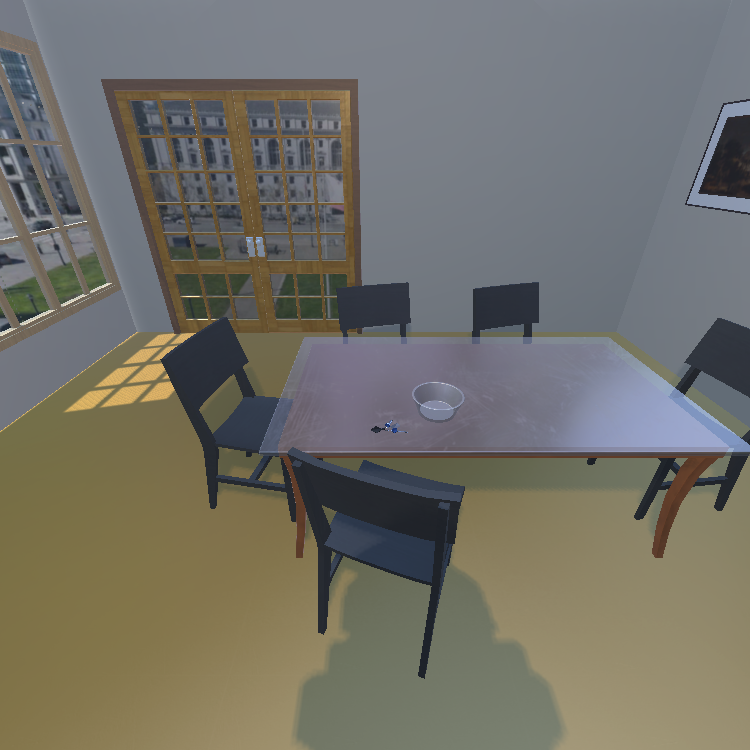

In [18]:
from PIL import Image
Image.fromarray(controller.last_event.frame)


In [19]:
img2text = Image.fromarray(controller.last_event.frame)

In [ ]:
!pip install transformers

In [12]:
from transformers import pipeline
caption = pipeline('image-to-text')

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
  warnings.warn(



In [14]:
import warnings,logging
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [20]:
caption(img2text)

[{'generated_text': 'a dining room table with chairs and a table with a glass table '}]

In [21]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

# unconditional image captioning
inputs = processor(img2text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


a table and chairs in a room with a window
